# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

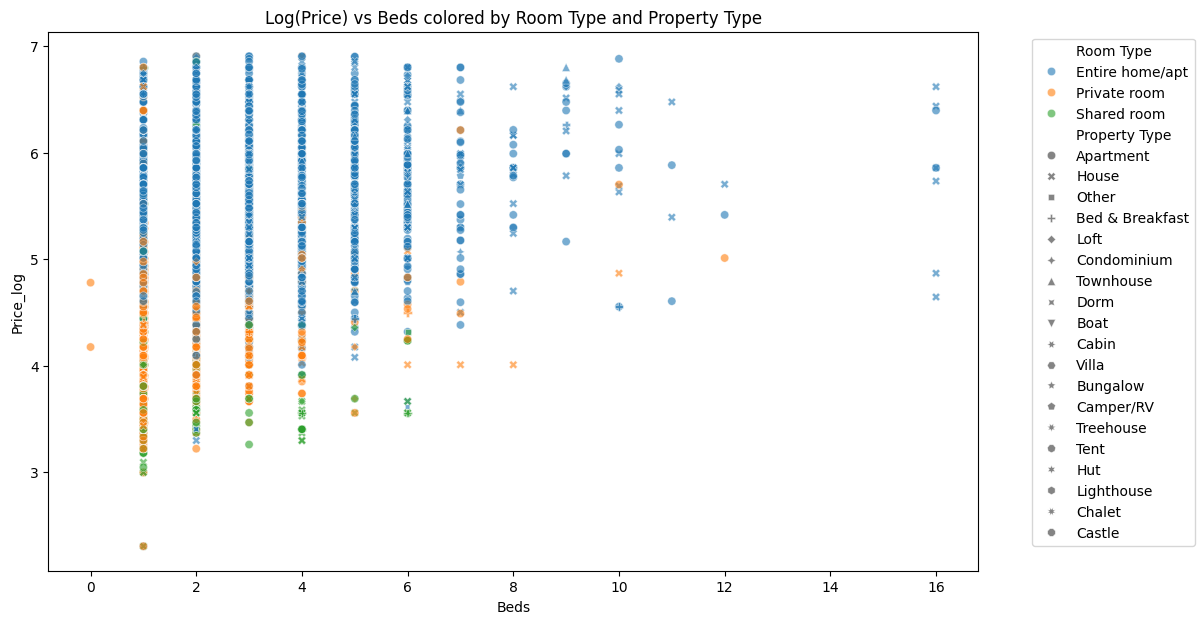

In [68]:

# Change directory into the repo
%cd eda_assignment

# Loading the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1 Loading the Airbnb data with pandas
df = pd.read_csv('data/airbnb_hw.csv')

#2 Seeing the Dimensions of the Data
print(df.shape)
# There are 30,478 Observations
# 13 Columns
print(df.head())
# The Variables are HostID, Host Since, Name, Neighbourhood, Property Type, Room  Type, Zipcode, Beds, Price, Review Scores Rating (bin), Number of Records, Number of Reviews, Price, Review Scores Rating


#3 Cross tabulating Room Type and Property Type
print(pd.crosstab(df['Room Type'], df['Property Type']))

# Apartments are dominating the data set. The two most common types of apartments are apartments with the entire home available, or for those renting a private room.

# Private Rooms are more common for Houses than the entire homes, with 1258 private room listings and 752 entire room listings. Houses are the second most common listings.

# The third most common Airbnb listing is the loft.


#4
#Stats Description
print(df['Price'].describe())


#Coercing price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#Histogram with 50 bins
df['Price'].hist(bins=50,grid=False)

#I think this histogram is fairly scaled, there are really no blairing issues with the scaling for this histogram.

#Kernel Density Plot
df['Price'].plot.density()

#This Kernel Plot is also fairly scaled. If I didn't coerce price to numeric it wouldve been very ugly.

#Box Plot
df['Price'].plot.box()

#This is very poorly scaled. We can see the sheer amount of outliers in this box plot.

#Creating log version of "Price"
df['Price_log'] = np.log(df['Price'])

#Histogram with 50 bins to compensate for the log transformation
df['Price_log'].hist(bins=50,grid=False)

#This histogram looks very good, fairly scaled.

#Kernel Density Plot
df['Price_log'].plot.density()

#This Kernel Plot is very well done. The log appeared to make the data more cleanly to make the graphs easier for the eye.

#Box Plot
df['Price_log'].plot.box()

#This is still kind of ugly, however it more-or-less gives the outliers less emphasis, which is good.

#Stats description for the log
print(df['Price_log'].describe())

#5

#We can see that total bedrooms are relatively inconsequential for the price. There are houses with all varying types of prices at different beds. Although as bedrooms increase, we can see that pricing typcally stays 4>.
df.plot.scatter(y='Price_log',x='Beds')
#Grouping Regular Price by Beds
df.groupby('Beds')['Price'].agg(['count', 'mean', 'std', 'median']).reset_index()

#We can see the mean price increases as beds increases. At 6 bedrooms and above the price starts to trend up and down, no clear trend.

#6
#Scatterplot of Price_Logs and Beds, with coloring by room type and property type being the style
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Beds',
    y='Price_log',
    hue='Room Type',
    style='Property Type',
    alpha=0.6
)
plt.title('Log(Price) vs Beds colored by Room Type and Property Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Grouping stats
grouped_stats = df.groupby(['Room Type', 'Property Type'])['Price'].agg(['count', 'mean', 'median', 'std']).reset_index()

# Sort by mean to see the most expensive combos
grouped_stats_sorted = grouped_stats.sort_values(by='mean', ascending=False)

# Show full table
pd.set_option('display.max_rows', None)
print(grouped_stats_sorted)



**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.